## Ejemplo: Visualización del esfuerzos para un problema de elasticidad plana

Queremos visualizar el campo de esfuerzos para una placa (infinitamente) grande con un agujero de radio $R$ y sometida a un esfuerzo $p$ remotamente, como se muestra a continuación.

<center>
    <img src="img/cuadrado_hueco.svg"
         alt="Esquema de la geometría."
         style="width:400px">
</center>

Los esfuerzos en este problema están dados por 

\begin{align*}
 \sigma_{rr} &= -\left(1 - \frac{R_1^2}{r^2}\right) p\, ,\\
 \sigma_{\theta\theta} &= -\left(1 + \frac{R_1^2}{r^2} \right) p\, ,\\
 \tau_{r\theta} &= 0\, .
\end{align*}




## Visualización

Inicialmente, veremos cómo visualizar este campo usando únicamente Python. Luego, usaremos Gmsh
para la creación de la geometría y el paquete [meshio](https://github.com/nschloe/meshio) para
importar la malla Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
import meshio

La siguiente celda configura algunos aspectos de las gráficas en este Notebook.

In [2]:
%matplotlib notebook
gris = '#757575'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["xtick.color"] = gris
plt.rcParams["ytick.color"] = gris
plt.rcParams["axes.labelcolor"] = gris
plt.rcParams["axes.edgecolor"] = gris
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

Definimos una función que me calcule el campo de esfuerzos

In [3]:
def esfuerzos_placa(r, R, p):
    """Campo de esfuerzos para placa con agujero y carga remota
    
    Los parámetros de entrada son:
      r : coordenada del punto.
      R : radio interno de la placa.
      p : valor de la carga remota.
    """
    return -(1 - R**2/r**2)*p,  -(1 + R**2/r**2)*p

## Visualización usando Python únicamente


Si consideramos el dominio de interés como un disco, esta visualización puede ser hecha completamente
en Python.

Inicialmente, definimos las coordenadas de los puntos. Por las características del problema, usaremos
coordenadas polares.

In [4]:
R_in = 1.0
R_out = 10.0

In [5]:
r = np.linspace(R_in, R_out, 20)
theta = np.linspace(0, 2*np.pi, 20)

Ahora, para poder visualizar la solución en 2D necesitamos una rejilla con las coordenadas
$(r, \theta)$. Por suerte, la función ``meshgrid`` de NumPy nos permite crearla.

In [6]:
r, theta = np.meshgrid(r, theta)

Si preferimos trabajar en coordenadas cartesianas podemos usar

\begin{align}
x &= r\cos\theta\\
y &= r\sin\theta
\end{align}

In [7]:
x = r*np.cos(theta)
y = r*np.sin(theta)

Y si hacemos un gráfico de los puntos obtenemos lo siguiente.

<IPython.core.display.Javascript object>


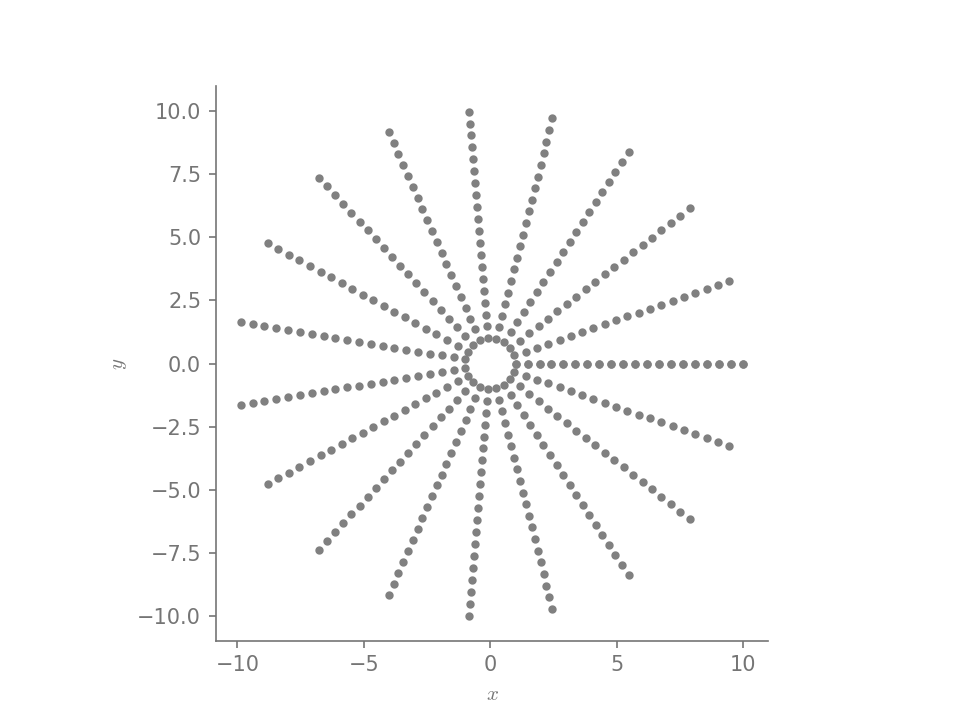

In [8]:
plt.figure()
plt.plot(x, y, ".", color="gray")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.axis("image");

Calculamos los esfuerzos para los puntos

In [9]:
sigma_rr, sigma_tt = esfuerzos_placa(r, R_in, 1.0)

<IPython.core.display.Javascript object>


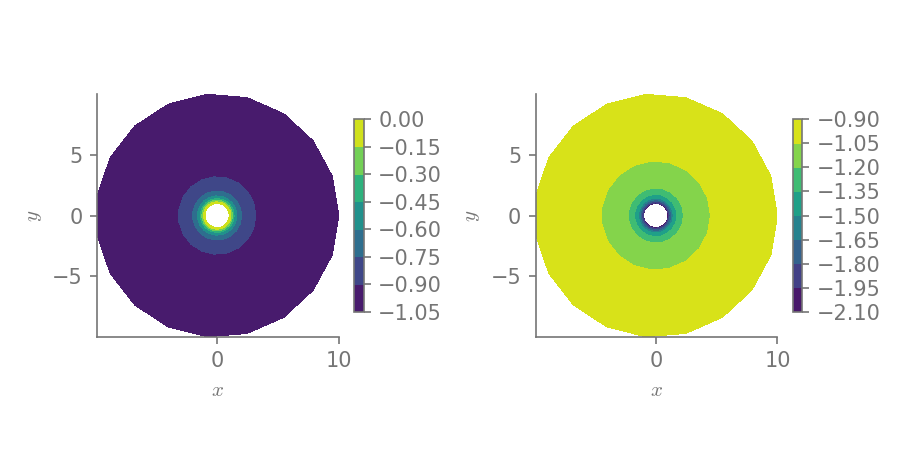

In [10]:
plt.figure(figsize=(6, 3))

# sigma_rr
plt.subplot(1, 2, 1)
plt.contourf(x, y, sigma_rr)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.colorbar(shrink=0.5)
plt.axis("image")

#sigma_tt
plt.subplot(1, 2, 2)
plt.contourf(x, y, sigma_tt)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.colorbar(shrink=0.5)
plt.axis("image")
plt.tight_layout();

## Visualización creando la geometría en Gmsh

Ahora, si la geometría es más complicada no tendremos una parametrización sencilla
de las coordenadas y no será práctico hacerlo completamente en Python.

En esta sección vamos a leer un archivo de malla creado en Gmsh y luego vamos a
visualizar el mismo campo de esfuerzos.

Podemos leer los archivos de malla generados con Gmsh usando meshio, como se muestra a continuación

In [11]:
mesh = meshio.read("files/cuadrado_hueco.msh")
points = mesh.points
cells = mesh.cells
point_data = mesh.point_data
cell_data = mesh.cell_data

In [12]:
x = points[:, 0]
y = points[:, 1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
triangulos = cells["triangle"]

Calculamos los esfuerzos para cada punto en la malla

In [13]:
R = 1.0
p = 1.0
sigma_rr, sigma_tt = esfuerzos_placa(r, R, p)

Y graficamos los esfuerzos

<IPython.core.display.Javascript object>


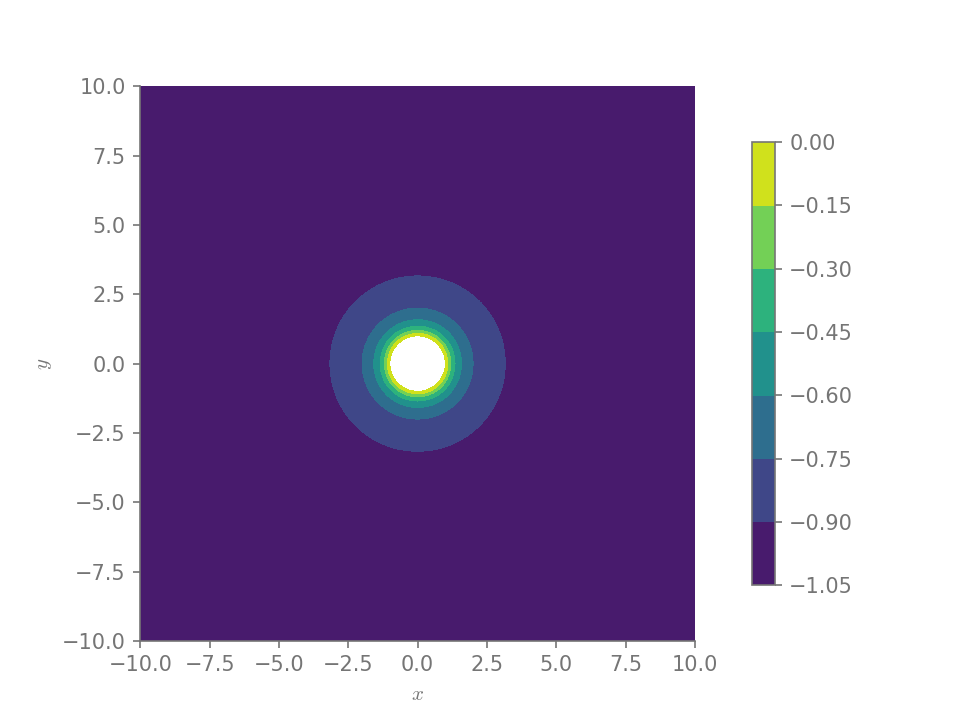

In [14]:
plt.figure()
plt.tricontourf(x, y, triangulos, sigma_rr)
plt.colorbar(shrink=0.8)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.axis("image");

<IPython.core.display.Javascript object>


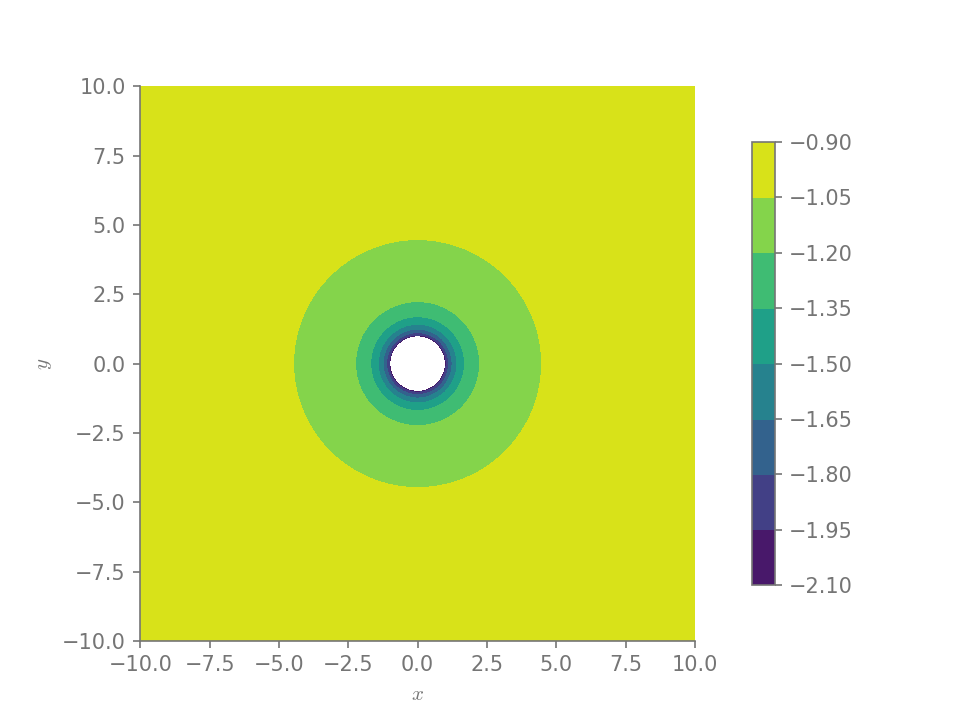

In [15]:
plt.figure()
plt.tricontourf(x, y, triangulos, sigma_tt)
plt.colorbar(shrink=0.8)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.axis("image");